In [1]:
import pandas as pd
import matplotlib as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix, plot_roc_curve,roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [2]:
df = pd.read_csv('data/weatherAUS.csv')

X_train_KNNI = pd.read_csv("data/X_train_KNNI.csv", index_col=0)
X_test_KNNI = pd.read_csv("data/X_test_KNNI.csv", index_col=0)
y_test = pd.read_csv("data/y_test.csv", index_col=0)
y_train = pd.read_csv("data/y_train.csv", index_col=0)


df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

## Dealing with Missing Values

In [5]:
#drop date, evaporation, sunshine(outliers),

In [6]:
df["Date"] = pd.to_datetime(df["Date"])   #Converting into Date
df["Month"] = df["Date"].dt.month         #abstracting month in diffrent column  
df.drop(columns='Date', inplace=True)
df.drop(columns='Evaporation', inplace=True)
df.drop(columns='Sunshine', inplace=True)
df.dropna(subset=['RainTomorrow'], inplace = True)

In [7]:
df.isna().sum().sum()

187900

In [8]:
X_train_scaled = X_train_KNNI.copy()
scale_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm','Cloud9am','Cloud3pm']
scale_feats = X_train_scaled[scale_cols]
scaler = StandardScaler().fit_transform(scale_feats.values)
X_train_scaled[scale_cols] = scaler

C:\Users\Colin\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


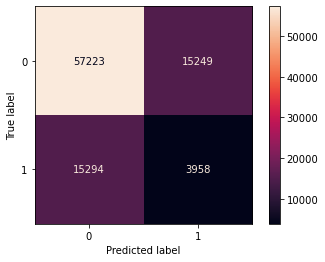

In [9]:
baseline = DummyClassifier(random_state=42)
baseline.fit(X_train_KNNI, y_train)

plot_confusion_matrix(baseline, X_train_KNNI, y_train, cmap='rocket');

C:\Users\Colin\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


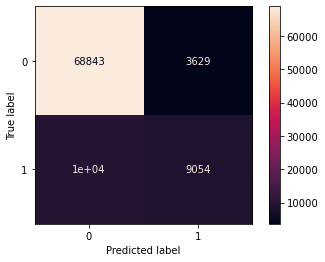

In [10]:
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)
plot_confusion_matrix(logreg_model, X_train_scaled, y_train, cmap='rocket');

In [11]:
print('Raw counts: \n')
print(y_train.value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(y_train.value_counts(normalize=True))

Raw counts: 

RainTomorrow
0               72472
1               19252
dtype: int64
-----------------------------------
Normalized counts: 

RainTomorrow
0               0.790109
1               0.209891
dtype: float64


In [12]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_scaled, y_train)

In [13]:
print('Original class distribution: \n')
print(y_train.value_counts())
print('-----------------------------------------')
# print('Synthetic sample class distribution: \n')
# print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

RainTomorrow
0               72472
1               19252
dtype: int64
-----------------------------------------


C:\Users\Colin\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


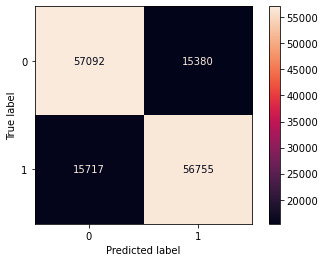

In [14]:
SMOTE_model = LogisticRegression(random_state=42, max_iter=1000)
SMOTE_model.fit(X_train_resampled, y_train_resampled)
plot_confusion_matrix(SMOTE_model, X_train_resampled, y_train_resampled, cmap='rocket');

In [15]:
corr = X_train_scaled.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='rocket', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

In [16]:
dt = DecisionTreeClassifier(max_depth=5)
dts = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train_KNNI, y_train)
dts.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5)

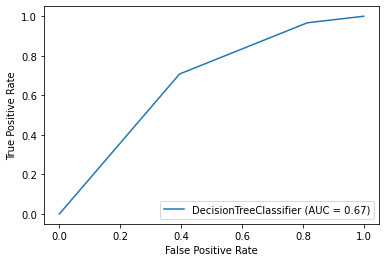

In [17]:
#max depth=5
plot_roc_curve(dt, X_train_scaled, y_train);

In [42]:
param_grid = {
    "max_depth": [3,5,7,8,9,10,11,12],
    "min_samples_split": [4,5,6],
    "min_samples_leaf": [1,2,5,7,10,13,15,25],
}

grid_cv = GridSearchCV(dt, param_grid, scoring='roc_auc', n_jobs=-1, cv=3).fit(X_train_KNNI, y_train)

print('Param for GS', grid_cv.best_params_)
print('CV score for GS', grid_cv.best_score_)
print('----------------')
print('Train AUC ROC score for GS: ', roc_auc_score(y_train, grid_cv.predict(X_train_KNNI)))
print('Test AUC ROC score for GS: ', roc_auc_score(y_test, grid_cv.predict(X_test_KNNI)))

Param for GS {'max_depth': 8, 'min_samples_leaf': 15, 'min_samples_split': 4}
CV score for GS 0.8329901582754263
----------------
Train AUC ROC score for GS:  0.7079540560992604
Test AUC ROC score for GS:  0.6977034953726218


In [29]:
param_grid = {
    "max_depth": [3,5,10,11,12,13,14,15,20],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5,7,10,13,15]
}

grid_cv = GridSearchCV(dts, param_grid, scoring='roc_auc', n_jobs=-1, cv=3).fit(X_train_resampled, y_train_resampled)

print('Param for GS', grid_cv.best_params_)
print('CV score for GS', grid_cv.best_score_)
print('----------------')
print('Train AUC ROC score for GS: ', roc_auc_score(y_train_resampled, grid_cv.predict(X_train_resampled)))
print('Test AUC ROC score for GS: ', roc_auc_score(y_test, grid_cv.predict(X_test_KNNI)))

Param for GS {'max_depth': 20, 'min_samples_leaf': 15, 'min_samples_split': 5}
CV score for GS 0.8924798938825834
----------------
Train AUC ROC score for GS:  0.8912752511314714
Test AUC ROC score for GS:  0.5018591175975364


In [20]:
dt2 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=25, min_samples_split=5)
dt2.fit(X_train_KNNI, y_train)

dts2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5)
dts2.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5)

In [43]:
dt3 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=25, min_samples_split=5, criterion='entropy')
dt3.fit(X_train_KNNI, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=25,
                       min_samples_split=5)

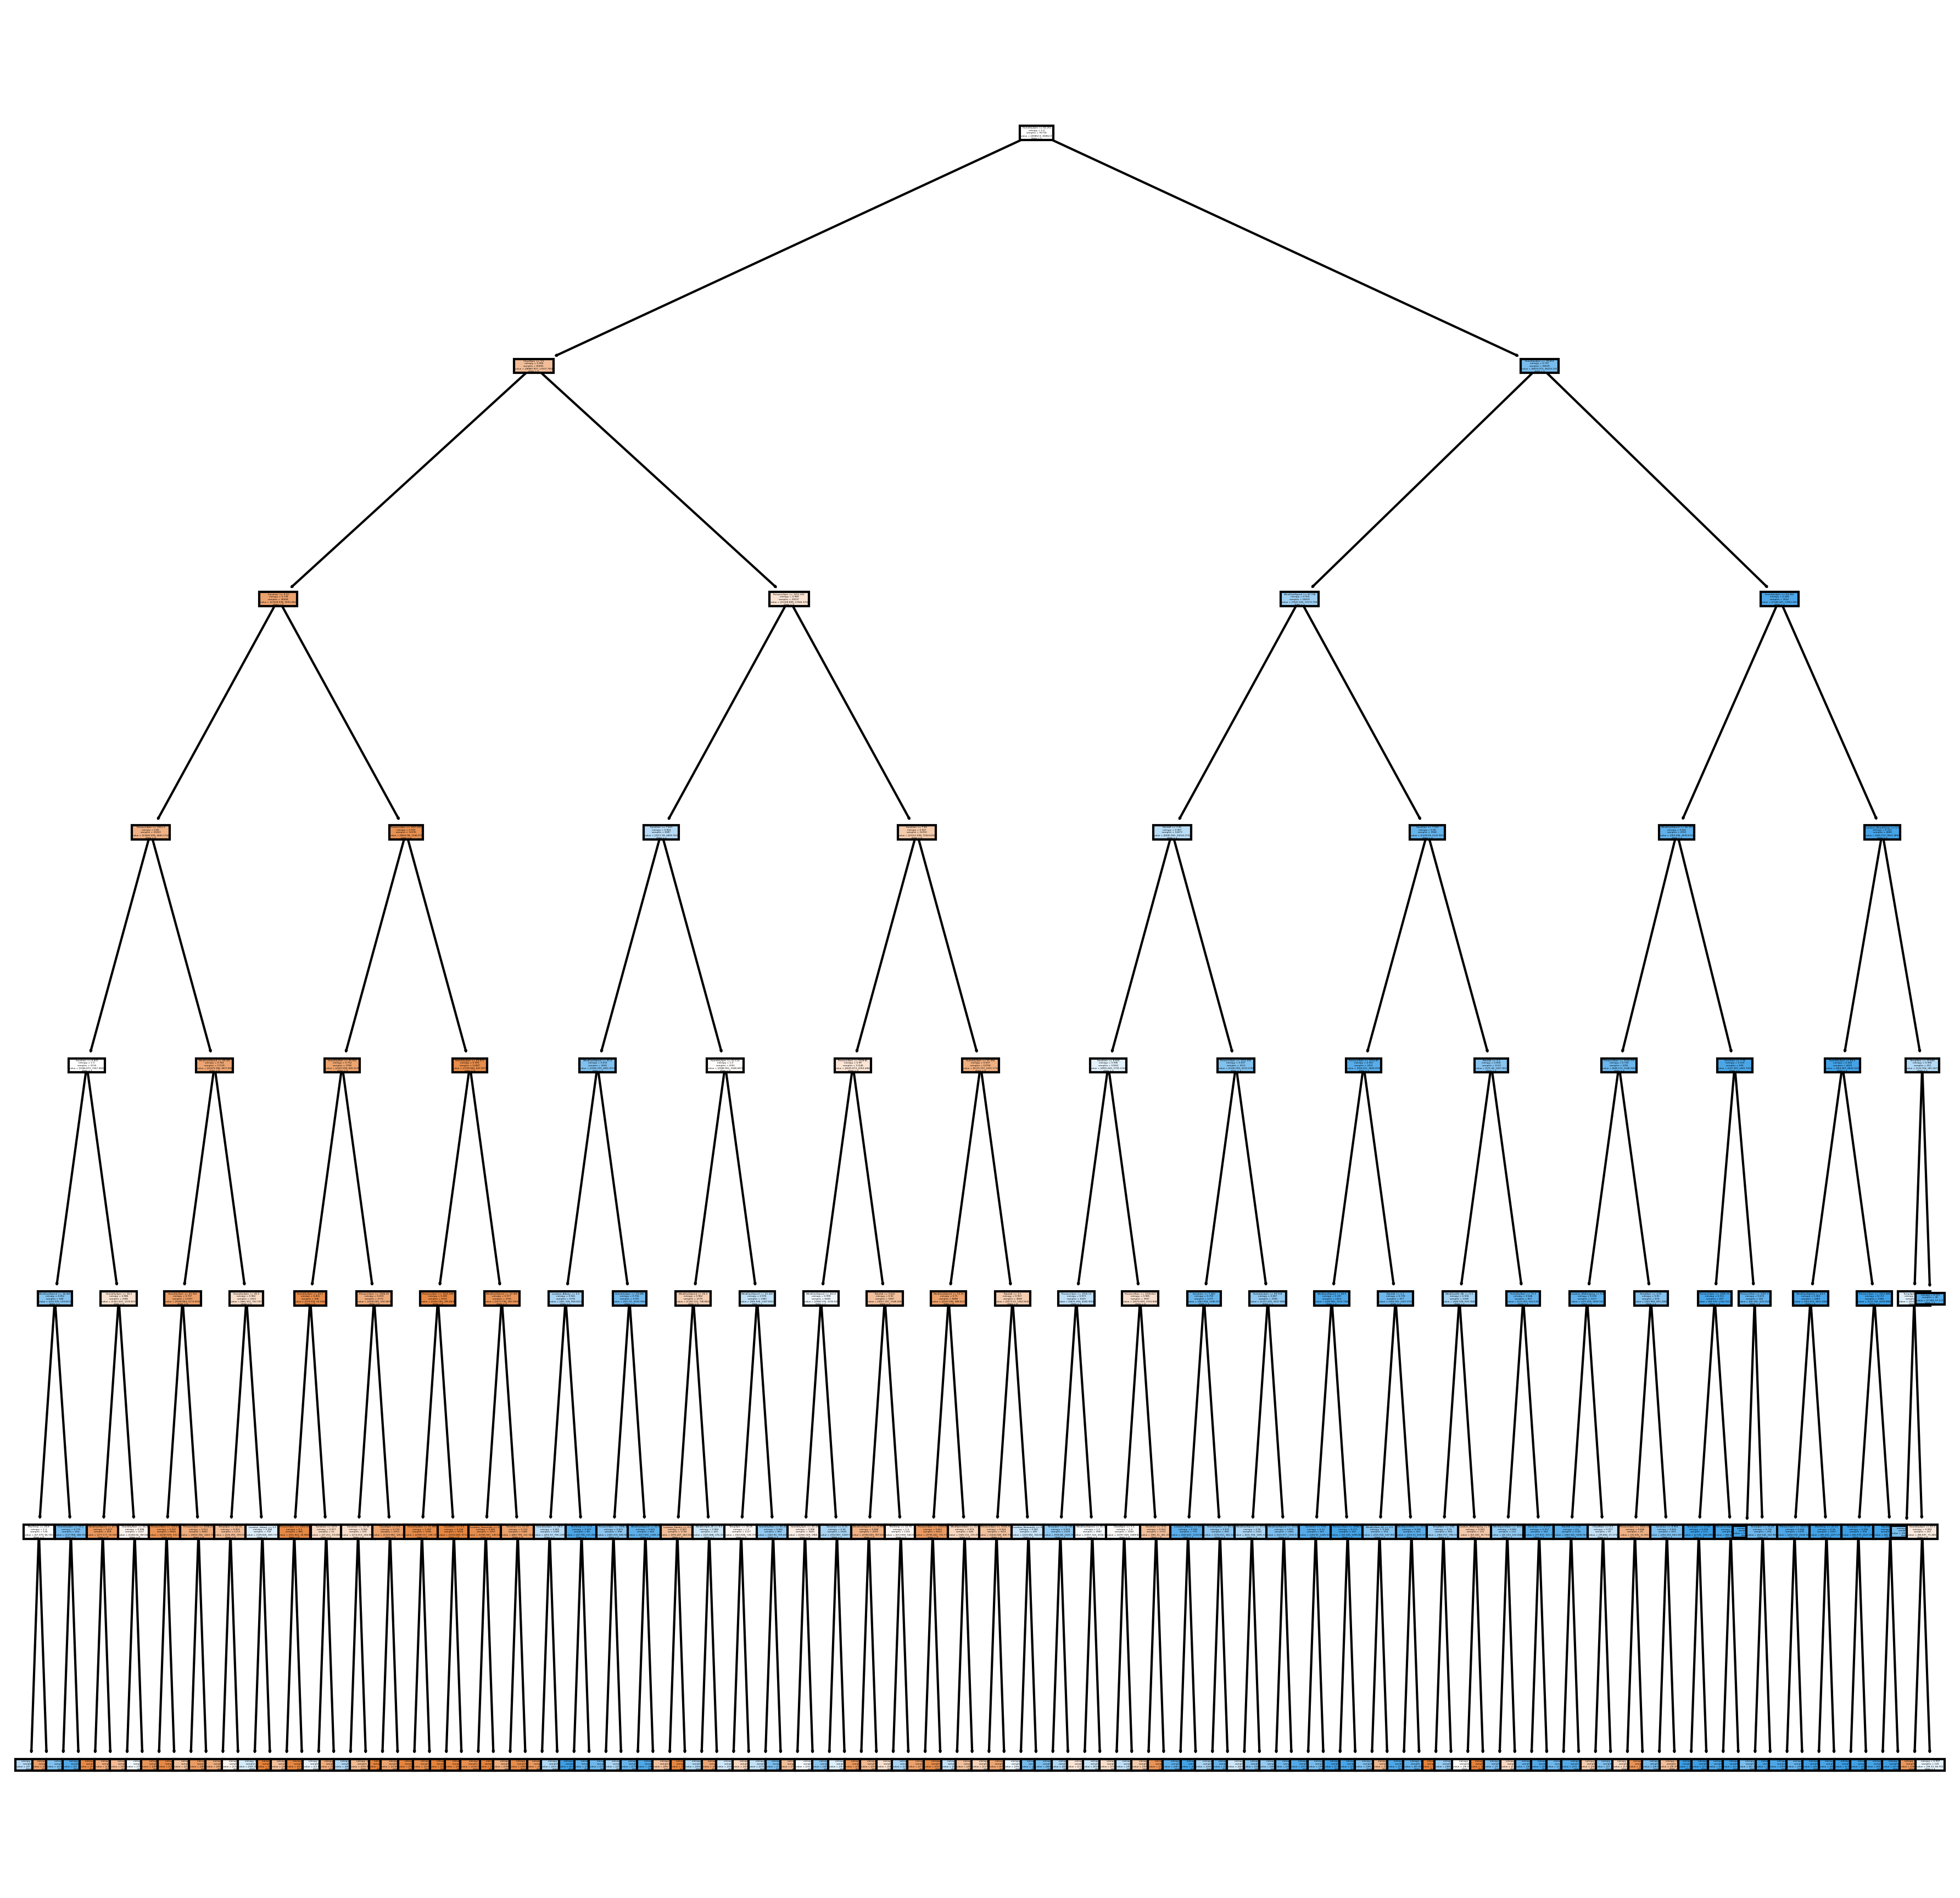

In [38]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15), dpi=300)
tree.plot_tree(dt3,
               feature_names = X_train_KNNI.columns, 
               class_names=np.unique(y_train).astype('str'),
               filled = True)
plt.show();

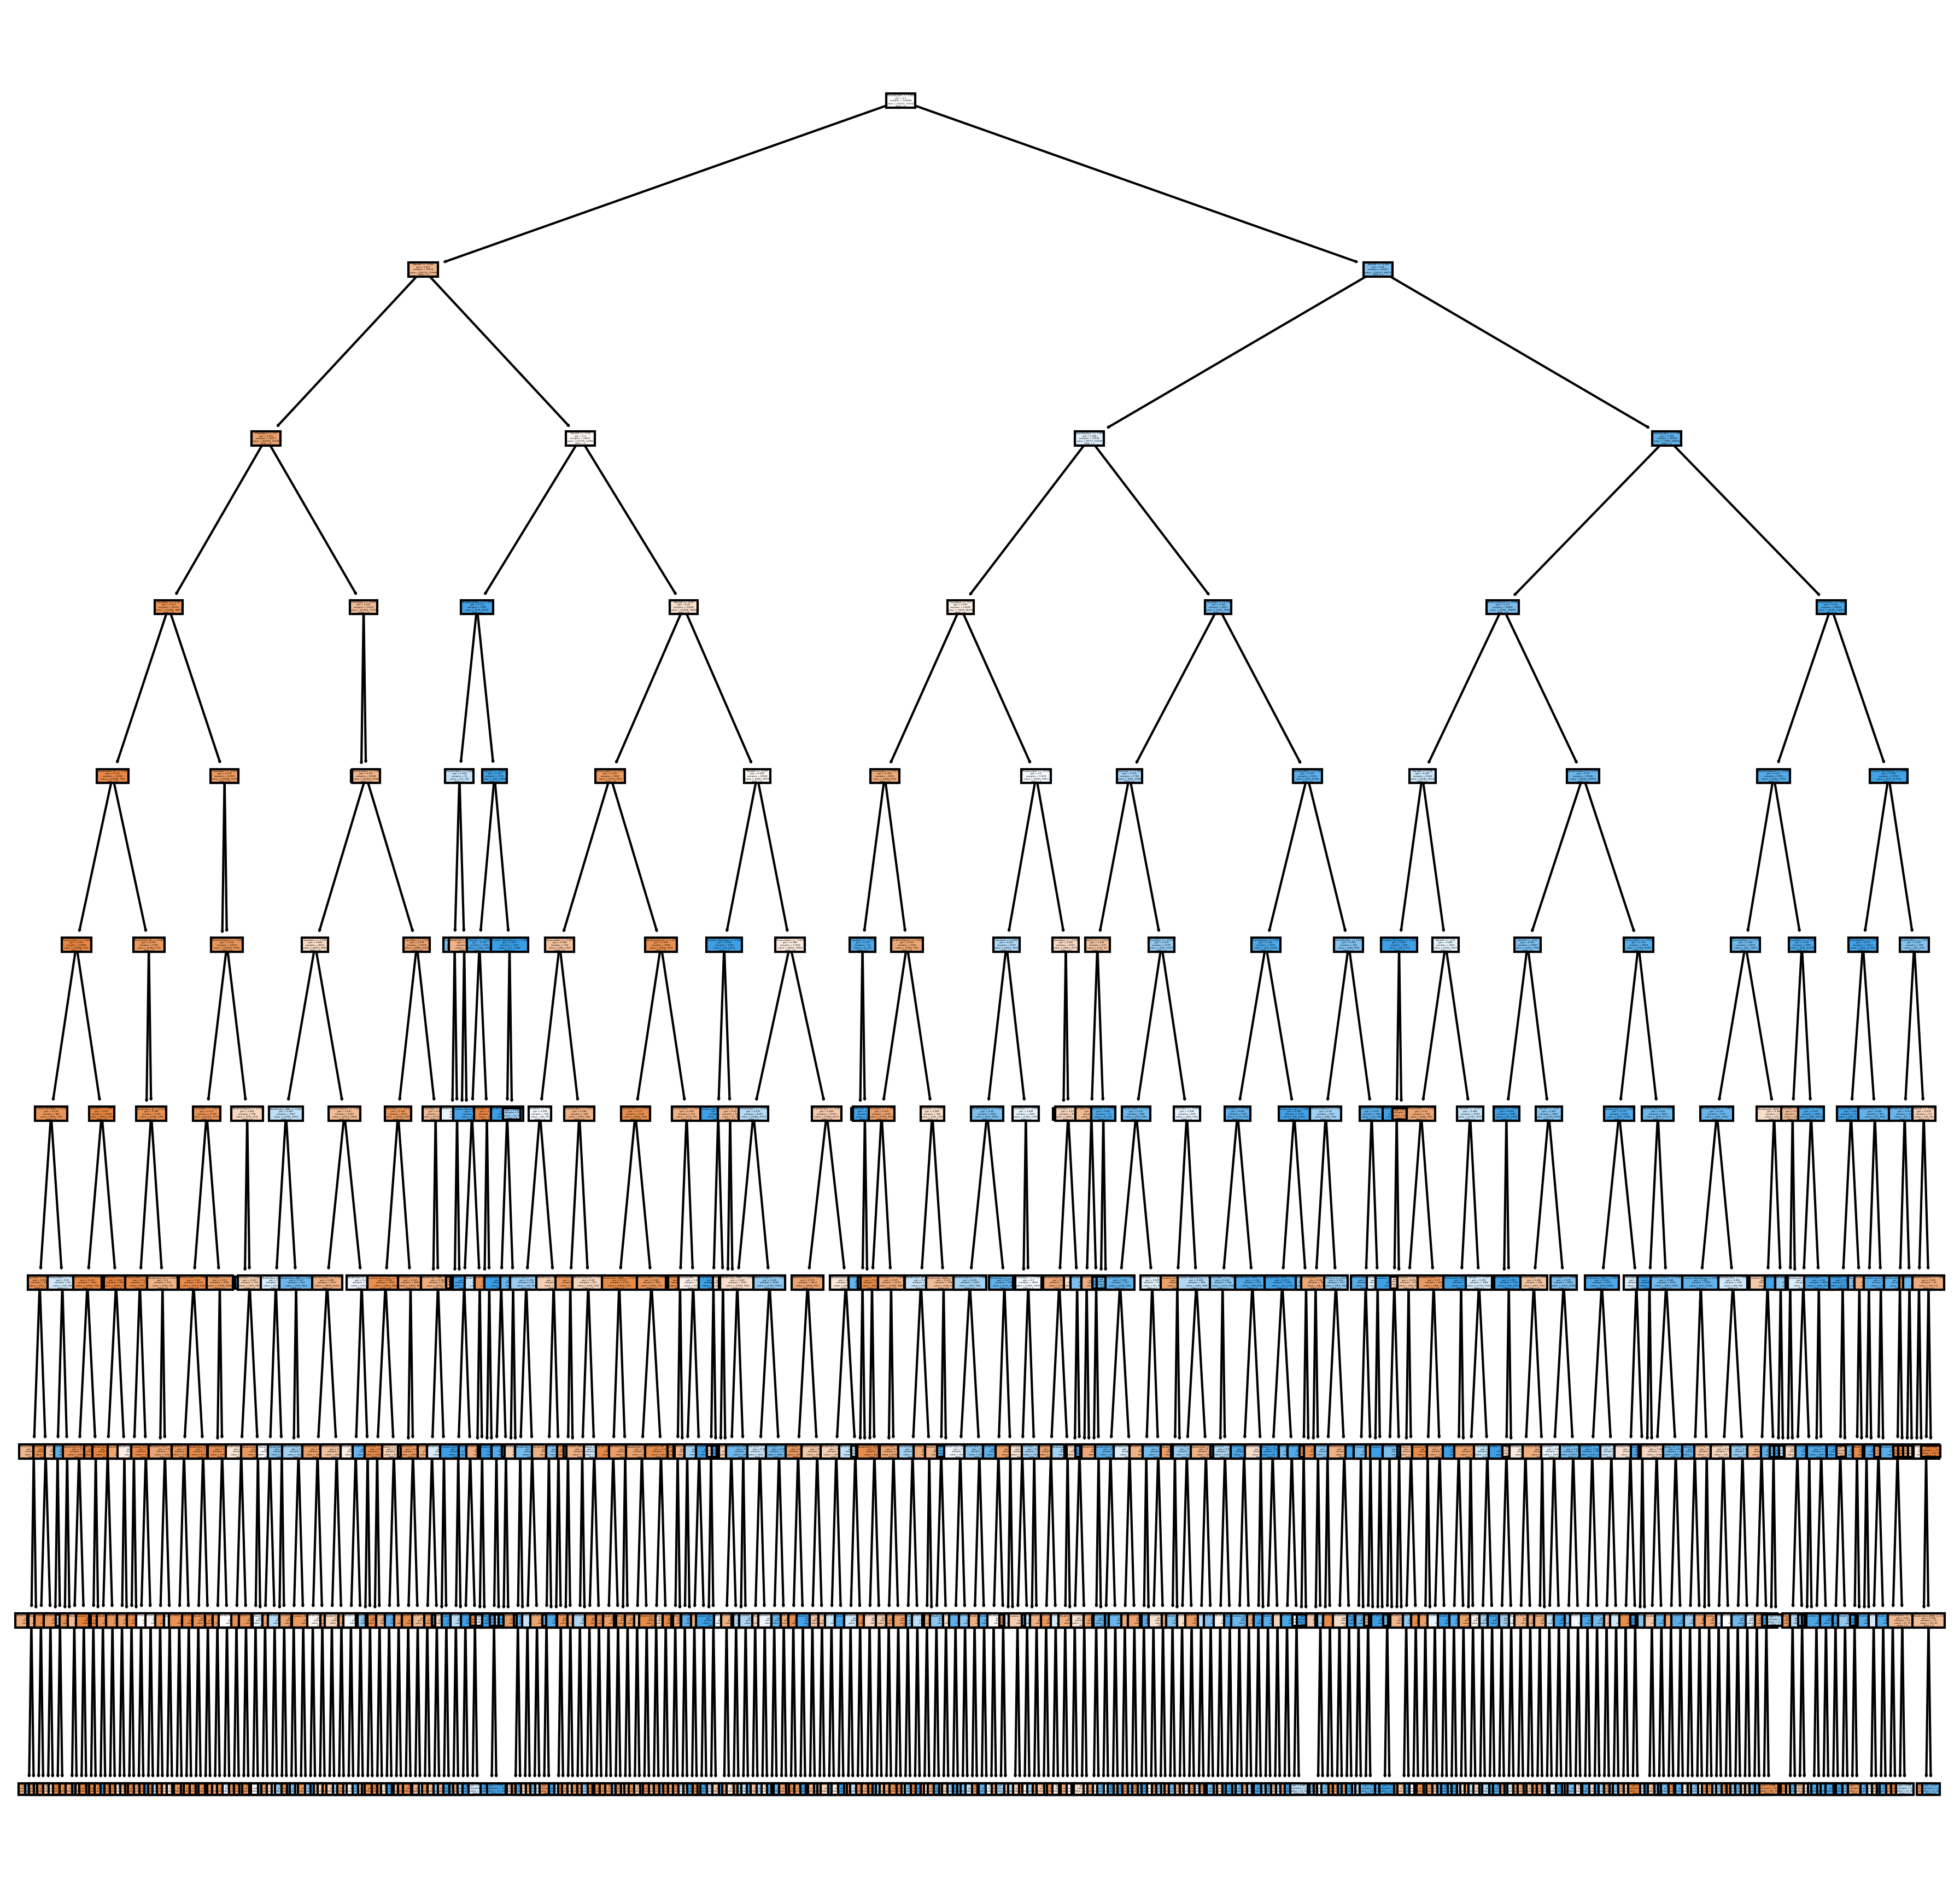

In [22]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15), dpi=300)
tree.plot_tree(dts2,
               feature_names = X_test_KNNI.columns, 
               class_names=np.unique(y_train).astype('str'),
               filled = True)
plt.show();

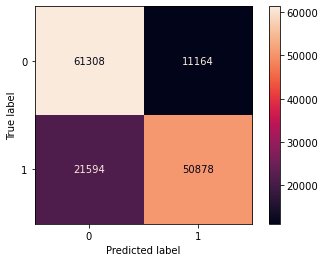

In [23]:
plot_confusion_matrix(dts, X_train_resampled, y_train_resampled, cmap='rocket')

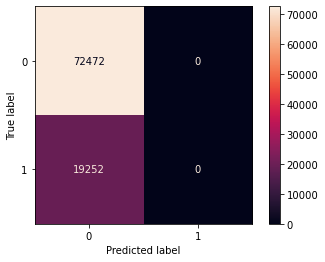

In [24]:
plot_confusion_matrix(dt, X_train_scaled, y_train, cmap='rocket')

In [34]:
def model_metrics(model, X_train, y_train, X_test, y_test, name):
    
    # calculate training data metrics
    y_train_pred = model.predict(X_train)
    accuracy_train = round(accuracy_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    f1_train = round(f1_score(y_train, y_train_pred), 3)
    cv = round(cross_val_score(model, X_train, y_train).mean(), 3)
    
    # calculate test data metrics
    y_test_pred = model.predict(X_test)
    accuracy_test = round(accuracy_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    f1_test = round(f1_score(y_test, y_test_pred), 3)
    
    # print metrics
    print(f"""
    {name} Model Training Metrics:
    Accuracy Score: {accuracy_train}
    Recall Score: {recall_train}
    Precision Score: {precision_train}
    F1 Score: {f1_train}
    Cross Validation Score: {cv}
    ------
    {name} Model Test Metrics:
    Accuracy Score: {accuracy_test}
    Recall Score: {recall_test}
    Precision Score: {precision_test}
    F1 Score: {f1_test}
    """)
    
    # plot confusion matrices & roc curves
    print(f"{name} Model Training Confusion Matrix")
    plt.show(plot_confusion_matrix(model, X_train, y_train, cmap='rocket'))
    print(f"{name} Model Training ROC Curve")
    plt.show(plot_roc_curve(model, X_train, y_train))
    print(f"{name} Model Test Confusion Matrix")
    plt.show(plot_confusion_matrix(model, X_test, y_test, cmap='rocket'))
    print(f"{name} Model Test ROC Curve")
    plt.show(plot_roc_curve(model, X_test, y_test))


    boolin Model Training Metrics:
    Accuracy Score: 0.862
    Recall Score: 0.487
    Precision Score: 0.772
    F1 Score: 0.597
    Cross Validation Score: 0.836
    ------
    boolin Model Test Metrics:
    Accuracy Score: 0.842
    Recall Score: 0.441
    Precision Score: 0.686
    F1 Score: 0.537
    
boolin Model Training Confusion Matrix


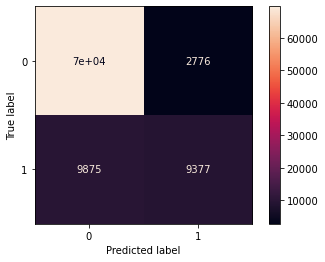

boolin Model Training ROC Curve


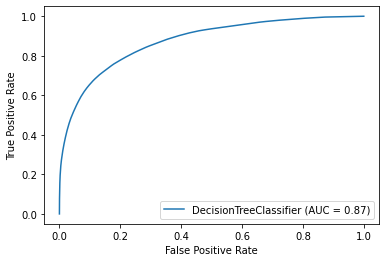

boolin Model Test Confusion Matrix


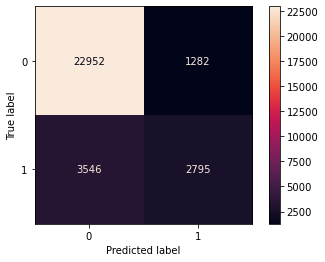

boolin Model Test ROC Curve


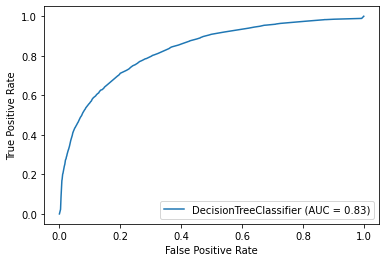

In [36]:
model_metrics(dt2, X_train_KNNI, y_train, X_test_KNNI, y_test, 'boolin')


    Decision Tree Model Training Metrics:
    Accuracy Score: 0.845
    Recall Score: 0.469
    Precision Score: 0.692
    F1 Score: 0.559
    Cross Validation Score: 0.84
    ------
    Decision Tree Model Test Metrics:
    Accuracy Score: 0.842
    Recall Score: 0.46
    Precision Score: 0.675
    F1 Score: 0.547
    
Decision Tree Model Training Confusion Matrix


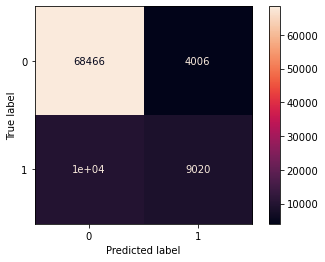

Decision Tree Model Training ROC Curve


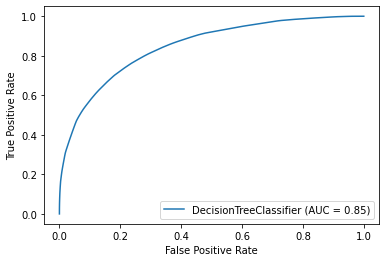

Decision Tree Model Test Confusion Matrix


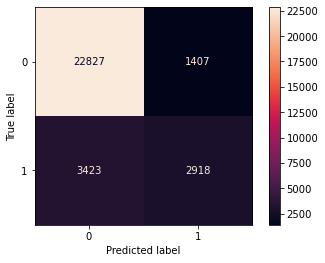

Decision Tree Model Test ROC Curve


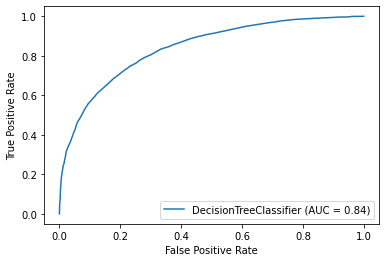

In [44]:
model_metrics(dt3, X_train_KNNI, y_train, X_test_KNNI, y_test, 'Decision Tree')